<a href="https://colab.research.google.com/github/GabrieleKasputyte/Duomenu-gavyba/blob/main/Suicide%20Data%20Analysis/Duomenu_transformacijos_tesinys1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WDI Wold Development Index - populiacijos kitimas per metus salyse. Duomenis WDId reikia isvalyti ir transponuoti

In [18]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/WDI-pop-struct.csv"
WDId = pd.read_csv(url,encoding="latin")

In [19]:
WDId.drop(columns=['Country Code','Series Code'], axis=1, inplace=True)


In [20]:
old_columns=list(WDId.columns)
tcolumns=old_columns[2:]
for column in range(len(tcolumns)):
  tcolumns[column]=tcolumns[column].split(' ')[0]
new_columns=old_columns[:2]+tcolumns

In [21]:
WDId.columns=new_columns
WDId

,Country Name,Series Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Afghanistan,"Population, male",4649576,4730252,4816049,4907033,5003250,5104766,5210120,5319118,5434457,5559838,5697018,5845348,6000891,6157843,6308578,6446271,6573732,6689150,6776022,6813203,6788279,6698727,6557678,6388703,6224256,6091891,5988521,5918154,5922667,6054347,6344615,6821674,7461094,8176786,8848710,9392624,9770489,10012241,10184269,10386587,10689506,11117752,11642104,12214634,12763723,13239686,13623891,13938967,14225722,14544059,14935754,15415362,15964873,16554276,17138798,17686166,18187045,18652134,19093281,19529725,..
1,Afghanistan,"Population, female",4347397,4439158,4535392,4636172,4741531,4851554,4964716,5080808,5202606,5333938,5476624,5630097,5790324,5951120,6104372,6242889,6369361,6482156,6565176,6597853,6568232,6472946,6324850,6149027,5980036,5846317,5747658,5686380,5695338,5814530,6067693,6477343,7024452,7639817,8227017,8718033,9082948,9344885,9553496,9784257,10090447,10489236,10958666,11466237,11962961,12414591,12809158,13161569,13496554,13850754,14249753,14702051,15196503,15715313,16231996,16727437,17196083,17644266,18079105,18512029,..
2,Afghanistan,"Population ages 80 and above, male (% of male ...",0.178381972,0.196247556,0.207908971,0.211451734,0.205246795,0.187471901,0.203642064,0.213418641,0.215458469,0.208783137,0.192030084,0.207566663,0.217250927,0.219167653,0.212076151,0.195027421,0.208815936,0.215154585,0.212617342,0.200581077,0.178012876,0.195992375,0.2071619,0.207350348,0.192440454,0.158669995,0.17129441,0.179464685,0.180763099,0.172983205,0.154288273,0.160107352,0.165619188,0.17113083,0.17708794,0.184048616,0.196745446,0.204180063,0.206485059,0.203791639,0.195790115,0.206039817,0.211963368,0.212900362,0.20866164,0.199279681,0.211914419,0.220410834,0.223721462,0.221196908,0.212844934,0.220805727,0.224492846,0.223954195,0.219262687,0.210520471,0.222076282,0.229793236,0.233325824,0.232778472,..
3,Afghanistan,"Population ages 80 and above, female (% of fem...",0.172195113,0.188279033,0.199343298,0.20396146,0.200631569,0.188249,0.203818223,0.213883093,0.217237285,0.213050925,0.200415219,0.214916292,0.2242015,0.226999288,0.22280734,0.210943936,0.226364937,0.234551808,0.233702798,0.222829996,0.201089274,0.21920457,0.228717067,0.225499054,0.205784473,0.165608593,0.180960694,0.192635669,0.197459712,0.192741354,0.176871147,0.187854804,0.198378492,0.208827019,0.219666496,0.231210359,0.247298483,0.257574063,0.262249492,0.261746982,0.25612339,0.268389372,0.276228826,0.278539507,0.274823219,0.265429628,0.277918259,0.285338256,0.287628933,0.285038696,0.278039868,0.28864002,0.295081027,0.297143283,0.294972875,0.28886075,0.303802609,0.314761978,0.320982291,0.322093255,..
4,Afghanistan,"Population ages 75-79, male (% of male populat...",0.423329196,0.4333809,0.43708018,0.434702865,0.427282694,0.415905531,0.424999645,0.429281293,0.427751949,0.419742597,0.406212085,0.408410034,0.405156231,0.398240098,0.389548651,0.380374831,0.385595275,0.387418779,0.385078386,0.377414154,0.364407855,0.36805484,0.364611044,0.355439851,0.340104523,0.316404321,0.32134818,0.322076674,0.319079118,0.312155981,0.300727373,0.307490553,0.314042502,0.321165348,0.330884351,0.344887538,0.352561534,0.358481183,0.362588509,0.364267807,0.363131774,0.36214149,0.359359381,0.354320891,0.346912806,0.338384209,0.338640283,0.336976118,0.335455662,0.335649171,0.337739851,0.339622277,0.341412027,0.343198296,0.345257484,0.348198699,0.356282077,0.363425126,0.370218618,0.377240296,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# Ismesti eilutes kuriose yra NaN

## Transponuojame WDId taip kad kiekvienoj eilutej yra salis, populiacijos kintamasis, metai ir verte  

In [22]:
WDId_melted=pd.melt(WDId, id_vars=['Country Name','Series Name'], var_name='Year', value_name='Population')
WDId_melted.columns=['Country','Agestruct','Year','Population']
WDId_melted.dropna(inplace=True)
WDId_melted['CY']=WDId_melted['Country'] + ' ' +  WDId_melted['Year']
WDId_melted.head(n=40)

,Country,Agestruct,Year,Population,CY
0,Afghanistan,"Population, male",1960,4649576,Afghanistan 1960
1,Afghanistan,"Population, female",1960,4347397,Afghanistan 1960
2,Afghanistan,"Population ages 80 and above, male (% of male ...",1960,0.178381972,Afghanistan 1960
3,Afghanistan,"Population ages 80 and above, female (% of fem...",1960,0.172195113,Afghanistan 1960
4,Afghanistan,"Population ages 75-79, male (% of male populat...",1960,0.423329196,Afghanistan 1960
5,Afghanistan,"Population ages 75-79, female (% of female pop...",1960,0.390808839,Afghanistan 1960
6,Afghanistan,"Population ages 70-74, male (% of male populat...",1960,0.876381552,Afghanistan 1960
7,Afghanistan,"Population ages 70-74, female (% of female pop...",1960,0.79714422,Afghanistan 1960
8,Afghanistan,"Population ages 65-69, male (% of male populat...",1960,1.447079119,Afghanistan 1960
9,Afghanistan,"Population ages 65-69, female (% of female pop...",1960,1.302481441,Afghanistan 1960


## Iskleidziam Agestruct - padarom is reiksmiu stulpelius, gaunam kintamaji WDId_reshaped

In [23]:
WDId_reshaped=WDId_melted.pivot( index='CY',columns='Agestruct',values='Population')

In [24]:
WDId_reshaped.iloc[:,len(WDId_reshaped.columns)-5:len(WDId_reshaped.columns)]

Agestruct,"Population ages 75-79, male (% of male population)","Population ages 80 and above, female (% of female population)","Population ages 80 and above, male (% of male population)","Population, female","Population, male"
CY,,,,,
Afghanistan 1960,0.423329196,0.172195113,0.178381972,4347397,4649576
Afghanistan 1961,0.4333809,0.188279033,0.196247556,4439158,4730252
Afghanistan 1962,0.43708018,0.199343298,0.207908971,4535392,4816049
Afghanistan 1963,0.434702865,0.20396146,0.211451734,4636172,4907033
Afghanistan 1964,0.427282694,0.200631569,0.205246795,4741531,5003250
...,...,...,...,...,...
Zimbabwe 2016,0.388016192,0.589127547,0.22844665,7356159,6674231
Zimbabwe 2017,0.401856028,0.597985534,0.238923875,7459621,6777124
Zimbabwe 2018,0.413221519,0.599574612,0.24497323,7559801,6879217


In [25]:
WDId_reshaped.columns

Index(['Population ages 0-14, female (% of female population)',
       'Population ages 0-14, male (% of male population)',
       'Population ages 10-14, female (% of female population)',
       'Population ages 10-14, male (% of male population)',
       'Population ages 15-19, female (% of female population)',
       'Population ages 15-19, male (% of male population)',
       'Population ages 20-24, female (% of female population)',
       'Population ages 20-24, male (% of male population)',
       'Population ages 25-29, female (% of female population)',
       'Population ages 25-29, male (% of male population)',
       'Population ages 30-34, female (% of female population)',
       'Population ages 30-34, male (% of male population)',
       'Population ages 35-39, female (% of female population)',
       'Population ages 35-39, male (% of male population)',
       'Population ages 40-44, female (% of female population)',
       'Population ages 40-44, male (% of male populati

In [ ]:
#unsWDId_melted=WDId_melted.unstack(level=-1)

# WHO savizudybiu duomenys kuriuos reikia isvalyti, rezultatu lentele yra who_data; 

In [26]:
import pandas as pd
url="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/WHO-mort.csv"
WHOd=pd.read_csv(url)
names=list(WHOd.iloc[0,:])
WHOd.columns=names
WHOd.drop([0],axis=0,inplace=True)
WHOd.columns=["Country","Year", "PmortBoth",	"PmortMale",	"PmortFemale",	"RSuicBoth",	"RSuicMale",	"RSuicFemale"]
WHOd


,Country,Year,PmortBoth,PmortMale,PmortFemale,RSuicBoth,RSuicMale,RSuicFemale
1,Afghanistan,2019,35.3 [21.8-49.8],34.4 [21.9-47.9],36.2 [21.7-51.6],4.1 [2.3-7.0],4.6 [2.6-7.9],3.6 [2.0-5.9]
2,Afghanistan,2018,35.4 [21.7-50.1],34.7 [22.0-48.5],36.0 [21.4-51.6],4.1 [2.3-6.8],4.6 [2.6-7.8],3.5 [2.0-5.8]
3,Afghanistan,2017,35.5 [21.7-50.4],35.0 [22.0-49.1],35.9 [21.3-51.7],4.1 [2.3-6.8],4.6 [2.7-7.9],3.4 [2.0-5.7]
4,Afghanistan,2016,35.6 [21.6-50.7],35.1 [22.0-49.4],36.0 [21.2-51.9],4.0 [2.3-6.7],4.4 [2.6-7.4],3.6 [2.1-5.9]
5,Afghanistan,2015,35.6 [21.6-50.8],35.4 [22.3-49.8],35.7 [21.0-51.7],4.0 [2.3-6.6],4.3 [2.5-7.3],3.6 [2.0-5.9]
...,...,...,...,...,...,...,...,...
3656,Zimbabwe,2004,24.5 [15.7-35.3],24.6 [16.7-34.7],24.5 [15.0-35.8],14.2 [7.5-22.8],15.7 [8.4-24.2],12.7 [6.7-21.4]
3657,Zimbabwe,2003,23.1 [14.7-33.4],23.5 [15.9-33.3],22.7 [13.7-33.5],13.2 [6.9-21.1],15.1 [8.1-23.1],11.4 [5.7-19.3]
3658,Zimbabwe,2002,22.7 [14.4-32.9],24.1 [16.3-33.9],21.5 [13.0-32.0],13.4 [7.0-21.6],15.5 [8.3-23.6],11.4 [5.7-19.7]
3659,Zimbabwe,2001,21.7 [13.8-31.6],23.6 [16.0-33.2],20.2 [12.1-30.4],12.8 [6.6-20.9],14.4 [7.7-22.0],11.3 [5.4-19.8]


In [27]:
#print(WHOd[(WHOd["Country"]=="Afghanistan")].iloc[:,:4])
data_who=WHOd

In [28]:
data_who.index = list(range(len(data_who)))
 
columns = list(data_who.columns)
columns.remove('Country')
columns.remove('Year')
columns

['PmortBoth',
 'PmortMale',
 'PmortFemale',
 'RSuicBoth',
 'RSuicMale',
 'RSuicFemale']

In [29]:
for column in columns:
    for i in range(len(data_who)):
        #data_who[column] = data_who[column][i][:4]
        data_who[column][i]=data_who[column][i].split(' ')[0]

In [30]:
for column in columns:
    for i in range(len(data_who)):
        data_who[column][i]=float(data_who[column][i])

In [31]:
data_who['CY']=data_who['Country'] + ' ' +  data_who['Year']
data_who

,Country,Year,PmortBoth,PmortMale,PmortFemale,RSuicBoth,RSuicMale,RSuicFemale,CY
0,Afghanistan,2019,35.3,34.4,36.2,4.1,4.6,3.6,Afghanistan 2019
1,Afghanistan,2018,35.4,34.7,36,4.1,4.6,3.5,Afghanistan 2018
2,Afghanistan,2017,35.5,35,35.9,4.1,4.6,3.4,Afghanistan 2017
3,Afghanistan,2016,35.6,35.1,36,4,4.4,3.6,Afghanistan 2016
4,Afghanistan,2015,35.6,35.4,35.7,4,4.3,3.6,Afghanistan 2015
...,...,...,...,...,...,...,...,...,...
3655,Zimbabwe,2004,24.5,24.6,24.5,14.2,15.7,12.7,Zimbabwe 2004
3656,Zimbabwe,2003,23.1,23.5,22.7,13.2,15.1,11.4,Zimbabwe 2003
3657,Zimbabwe,2002,22.7,24.1,21.5,13.4,15.5,11.4,Zimbabwe 2002
3658,Zimbabwe,2001,21.7,23.6,20.2,12.8,14.4,11.3,Zimbabwe 2001


# Apjungiam who_data su WDId_reshaped gaunam kintamaji mortd. Bet kokius rodiklius is World Data Bank reikia apdoroti kaip kad WDId ir prijungti per "Country year" indeksa. 

In [32]:
mortd=pd.merge(data_who, WDId_reshaped,on='CY')

#mortd.drop(columns=['Country_y','Year_y'], axis=1,inplace=True)
#mortd.rename(columns={'Country_x' : 'Country', 'Year_x' : 'Year' }, inplace=True)

# Uzdavinys - pasiimti sugeneruotus duomenis. Žr. https://stackoverflow.com/questions/49394737/exporting-data-from-google-colab-to-local-machine


In [84]:
from google.colab import files
mortd.to_csv('mortd.csv',index=False)
files.download('mortd.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Sugrupuoti mort pagal salis ir suskaiciuoti , palyginti ar visos salys turi tiek pat tasku

In [35]:
import numpy as np
countries=[]
minyear=[]
maxyear=[]
for i in np.unique(mortd['Country']):
  countries.append(i)
  minyear.append(np.min(mortd[mortd['Country']==i]['Year']))
  maxyear.append(np.max(mortd[mortd['Country']==i]['Year']))


mortdates=pd.DataFrame(data={'Country': countries, 'Minyear': minyear, 'Maxyear': maxyear})



In [ ]:
d=mortd[mortd['Country']=='Eritrea']
mortd.describe(include=(object, float))

In [36]:
mortdates

,Country,Minyear,Maxyear
0,Afghanistan,2000,2019
1,Albania,2000,2019
2,Algeria,2000,2019
3,Angola,2000,2019
4,Antigua and Barbuda,2000,2019
...,...,...,...
154,Uruguay,2000,2019
155,Uzbekistan,2000,2019
156,Vanuatu,2000,2019
157,Zambia,2000,2019


# Suskaiciuosim koreliacija tarp savizudybiu skaiciaus ir metu ir naudosim koreliacine matrica

In [96]:
mortd

,Country,Year,PmortBoth,PmortMale,PmortFemale,RSuicBoth,RSuicMale,RSuicFemale,CY,"Population ages 0-14, female (% of female population)","Population ages 0-14, male (% of male population)","Population ages 10-14, female (% of female population)","Population ages 10-14, male (% of male population)","Population ages 15-19, female (% of female population)","Population ages 15-19, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 20-24, male (% of male population)","Population ages 25-29, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 30-34, male (% of male population)","Population ages 35-39, female (% of female population)","Population ages 35-39, male (% of male population)","Population ages 40-44, female (% of female population)","Population ages 40-44, male (% of male population)","Population ages 45-49, female (% of female population)","Population ages 45-49, male (% of male population)","Population ages 50-54, female (% of female population)","Population ages 50-54, male (% of male population)","Population ages 55-59, female (% of female population)","Population ages 55-59, male (% of male population)","Population ages 60-64, female (% of female population)","Population ages 60-64, male (% of male population)","Population ages 65-69, female (% of female population)","Population ages 65-69, male (% of male population)","Population ages 70-74, female (% of female population)","Population ages 70-74, male (% of male population)","Population ages 75-79, female (% of female population)","Population ages 75-79, male (% of male population)","Population ages 80 and above, female (% of female population)","Population ages 80 and above, male (% of male population)","Population, female","Population, male"
0,Afghanistan,2019.0,35.3,34.4,36.2,4.1,4.6,3.6,Afghanistan 2019,42.59679246,42.35420188,13.51315874,13.38952152,11.87149113,11.88710933,9.961009138,9.988106849,7.741214767,7.94343925,6.14755378,6.430479033,5.155172069,5.29074984,4.097513887,4.272471397,3.262040954,3.326697808,2.620193463,2.612504517,2.064522367,2.02930128,1.6002621,1.501782385,1.20763093,1.063440365,0.891814674,0.689697301,0.460695018,0.377240296,0.322093255,0.232778472,18512029,19529725
1,Afghanistan,2018.0,35.4,34.7,36,4.1,4.6,3.5,Afghanistan 2018,43.22341557,42.96393194,13.57990725,13.4743477,11.88151655,11.87172207,9.813102903,9.859701253,7.582571906,7.837661079,6.105887428,6.367722526,5.081775258,5.235556218,4.029398062,4.195035857,3.222141152,3.27310843,2.587544283,2.582500862,2.041979483,1.999985021,1.578980644,1.480932086,1.218991509,1.050733505,0.862531355,0.677864707,0.449181611,0.370218618,0.320982291,0.233325824,18079105,19093281
2,Afghanistan,2017.0,35.5,35,35.9,4.1,4.6,3.4,Afghanistan 2017,43.82367254,43.54888233,13.6297315,13.54231198,11.89814673,11.85496879,9.633427011,9.718139919,7.437189011,7.743829946,6.086427857,6.313574668,4.998468045,5.180118899,3.968176151,4.116269662,3.189747115,3.229221984,2.557349681,2.557668795,2.023596975,1.97209037,1.561499844,1.464755628,1.238593513,1.040714969,0.824387674,0.666545679,0.444555882,0.363425126,0.314761978,0.229793236,17644266,18652134
3,Afghanistan,2016.0,35.6,35.1,36,4.0,4.4,3.6,Afghanistan 2016,44.42952369,44.12317396,13.68265497,13.60327056,11.89263175,11.82541216,9.436873642,9.575249214,7.309121394,7.656152523,6.066154556,6.262706195,4.914487841,5.121429083,3.912710338,4.041739938,3.160786958,3.192578169,2.530135728,2.53542724,2.007550113,1.947215686,1.552235824,1.452450031,1.255237109,1.032226656,0.786884929,0.65588079,0.441863513,0.356282077,0.303802609,0.222076282,17196083,18187045
4,Afghanistan,2015.0,35.6,35.4,35.7,4.0,4.3,3.6,Afghanistan 2015,45.06469222,44.69956349,13.74243406,13.65860187,11.84026579,11.77183907,9.238713618,9.440355813,7.201288518,7.571510976,6.027594066,6.210430231,4.836473155,5.057246438,3.862325113,3.975717518,3

In [100]:
mortd_c=mortd.iloc[:,1:8].copy()
mortd_m=mortd.iloc[:,0:8].copy() # to melt for visualization
mortd_c['Year']=mortd_c['Year'].astype(float)
mortd_c=mortd_c.astype(float)

In [102]:
#WDId_melted=pd.melt(WDId, id_vars=['Country Name','Series Name'], var_name='Year', value_name='Population')
mortd_m_melted=pd.melt(mortd_m, id_vars=['Country','Year'], var_name='Gender',value_name='Drate')

In [105]:
mortd_m_melted

,Country,Year,Gender,Drate
0,Afghanistan,2019.0,PmortBoth,35.3
1,Afghanistan,2018.0,PmortBoth,35.4
2,Afghanistan,2017.0,PmortBoth,35.5
3,Afghanistan,2016.0,PmortBoth,35.6
4,Afghanistan,2015.0,PmortBoth,35.6
...,...,...,...,...
19075,Zimbabwe,2004.0,RSuicFemale,12.7
19076,Zimbabwe,2003.0,RSuicFemale,11.4
19077,Zimbabwe,2002.0,RSuicFemale,11.4
19078,Zimbabwe,2001.0,RSuicFemale,11.3


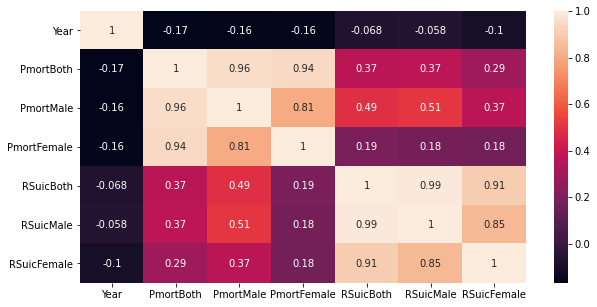

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

mortd_cc=mortd_c.corr()
plt.figure(figsize=(10,5))
sns.heatmap(mortd_cc,annot=True)

In [104]:
mortd_cc

,Year,PmortBoth,PmortMale,PmortFemale,RSuicBoth,RSuicMale,RSuicFemale
Year,1.000000,-0.168932,-0.160375,-0.158333,-0.067876,-0.057558,-0.099902
PmortBoth,-0.168932,1.000000,0.958156,0.941408,0.367982,0.373729,0.291819
PmortMale,-0.160375,0.958156,1.000000,0.806978,0.489803,0.509027,0.366139
PmortFemale,-0.158333,0.941408,0.806978,1.000000,0.191859,0.182162,0.177951
RSuicBoth,-0.067876,0.367982,0.489803,0.191859,1.000000,0.991631,0.905303
RSuicMale,-0.057558,0.373729,0.509027,0.182162,0.991631,1.000000,0.845629
RSuicFemale,-0.099902,0.291819,0.366139,0.177951,0.905303,0.845629,1.000000


# Kiekvienai saliai pavaizduokim tendencijas pagal metus x=Year, y=RSuicBoth su seaborn relplot

# Vizualizacija su mortd_m_melted

In [ ]:
import seaborn as sns

mortd_m_melted['Drate']=mortd_m_melted['Drate'].astype('float')
mortd_m_melted['Year']=mortd_m_melted['Year'].astype('float')

sns.relplot(x="Year", y="Drate", col="Country", hue="Gender", col_wrap=10,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=mortd_m_melted);

# Vizualizacija su mortd

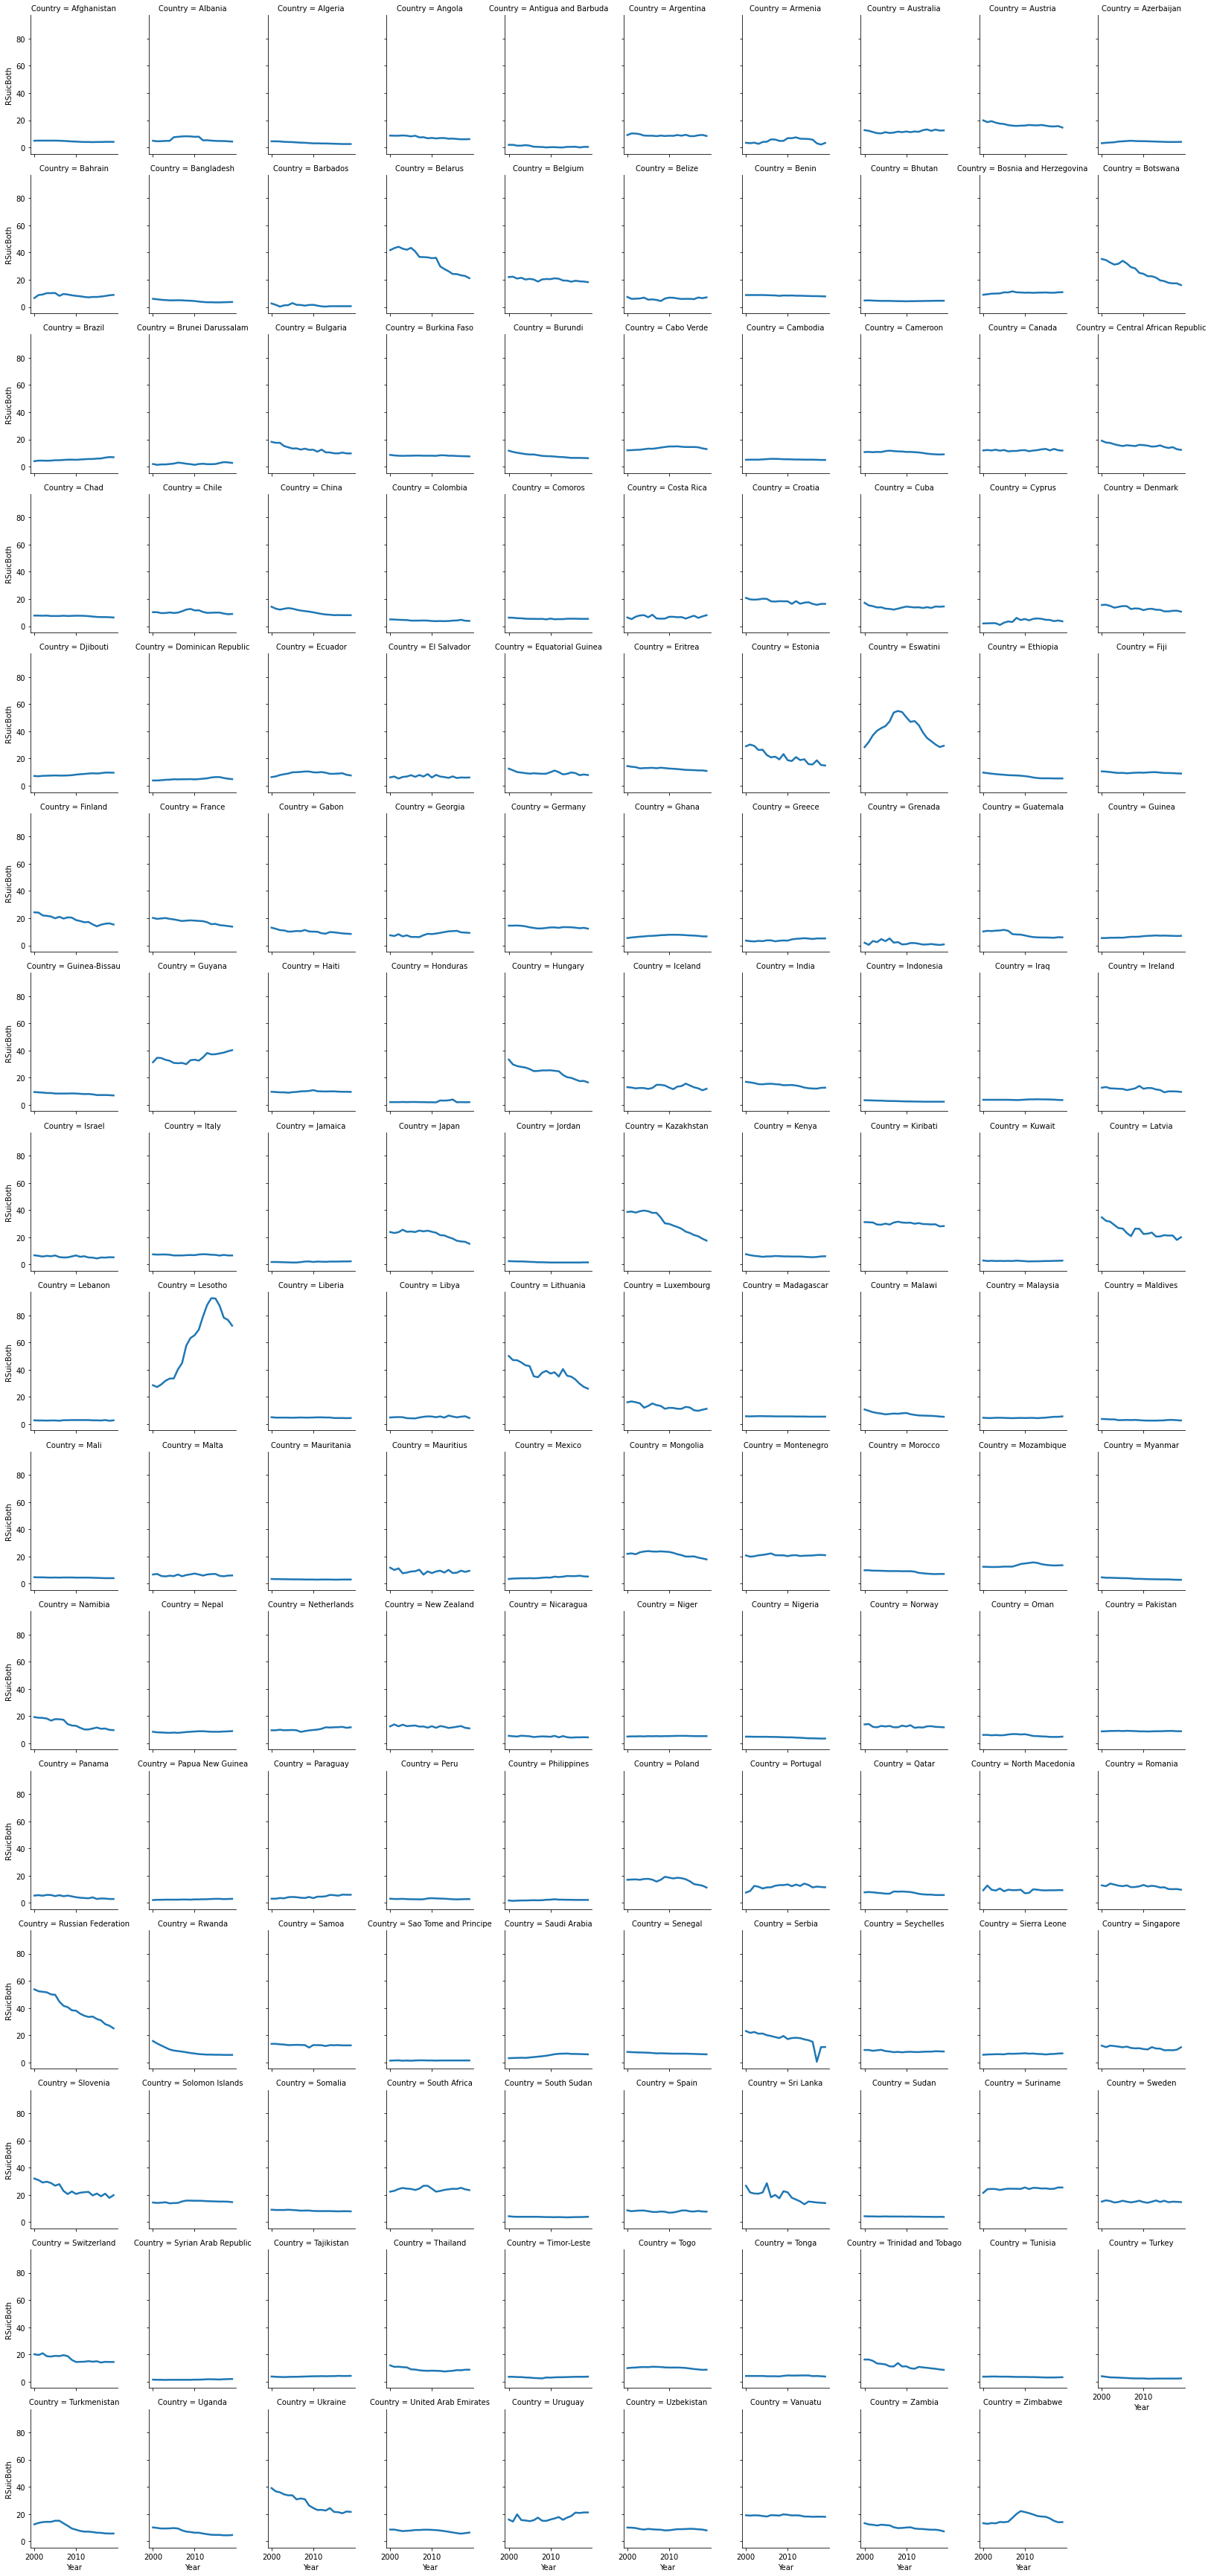

In [44]:
import seaborn as sns

mortd['Year']=mortd['Year'].astype(float)
mortd['RSuicBoth']=mortd['RSuicBoth'].astype(float)

sns.relplot(x="Year", y="RSuicBoth", col="Country", col_wrap=10,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=mortd);
#len(np.unique(mortd['Country']))

Suskaiciuokim koreliacija tarp saliu pagal savizudybiu tendencijas. Reikia pasidaryti teisinga duomenu formata. Koreliacijai naudojam ankstesni pavyzdi. Issiaiskinkim ka mums gali duoti clustermap. 

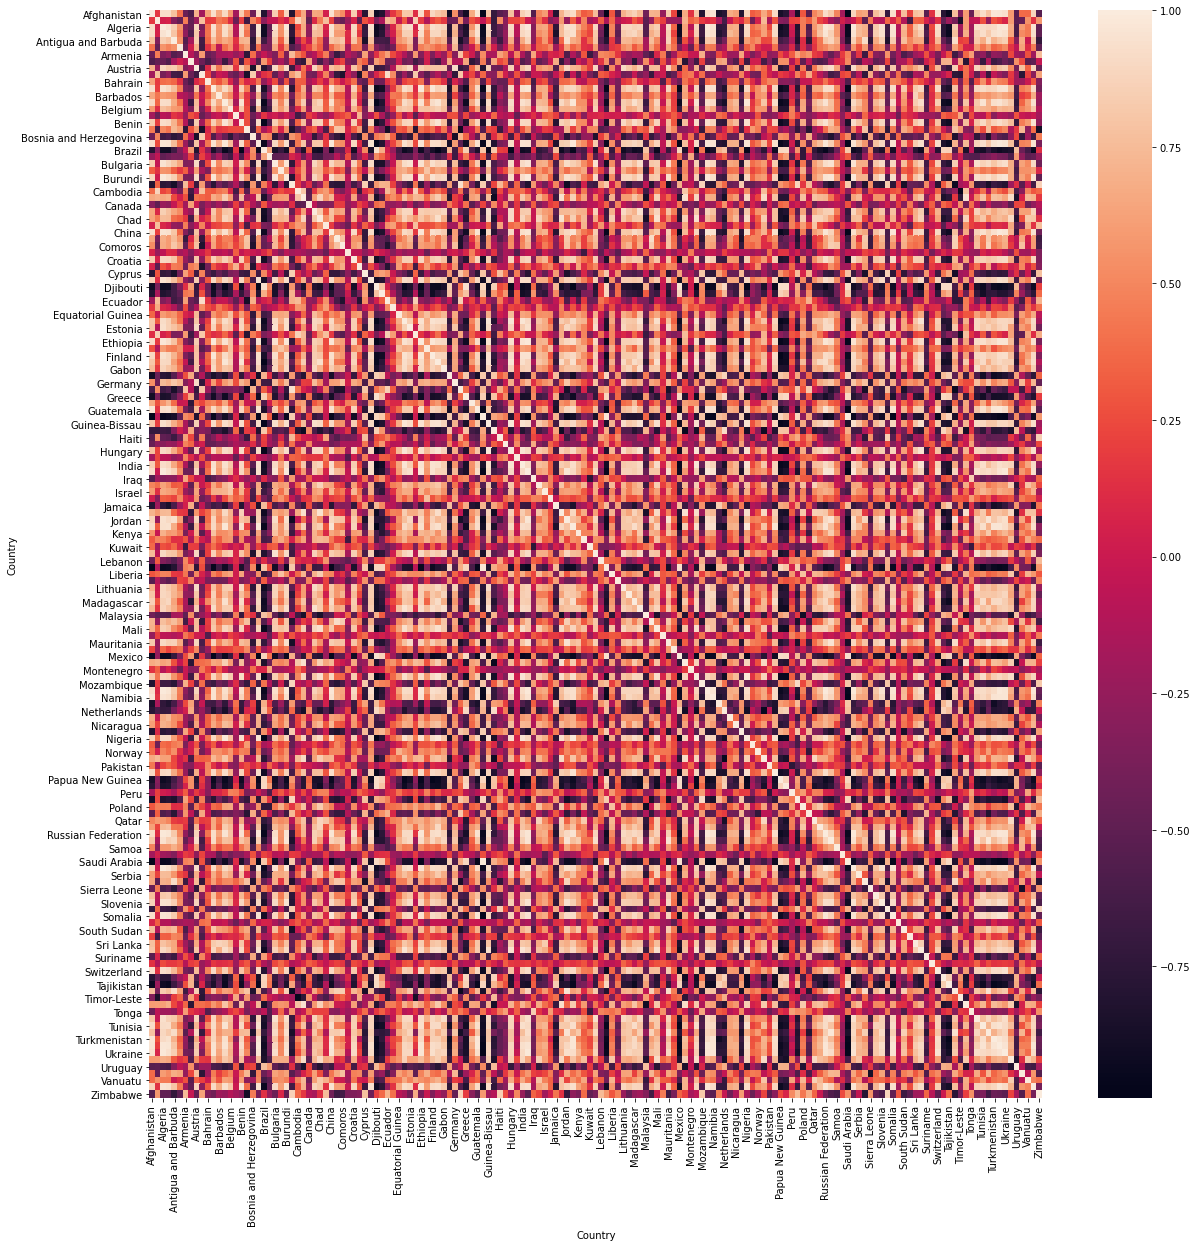

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

mortd_ccr=mortd[['Country','Year','RSuicBoth']].copy()
mortd_ccr_reshaped=mortd_ccr.pivot(index='Year',columns='Country',values='RSuicBoth')
mortd_ccr_reshaped=mortd_ccr_reshaped.astype(float)

mortd_ccr_reshaped_c=mortd_ccr_reshaped.corr()
plt.figure(figsize=(20,20))
#sns.heatmap(mortd_ccr_reshaped_c,annot=True)
sns.heatmap(mortd_ccr_reshaped_c)


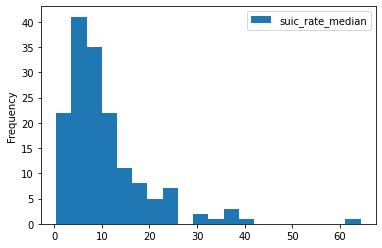

In [122]:
suic_rate_median=pd.DataFrame(mortd_ccr_reshaped.median(axis=0), columns=['suic_rate_median'] )
suic_rate_median.sort_values(ascending=False,by='suic_rate_median')
suic_rate_median.plot.hist(bins=20)

In [61]:
mortd_ccr_reshaped_c.shape

(159, 159)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1440x1440 with 0 Axes>

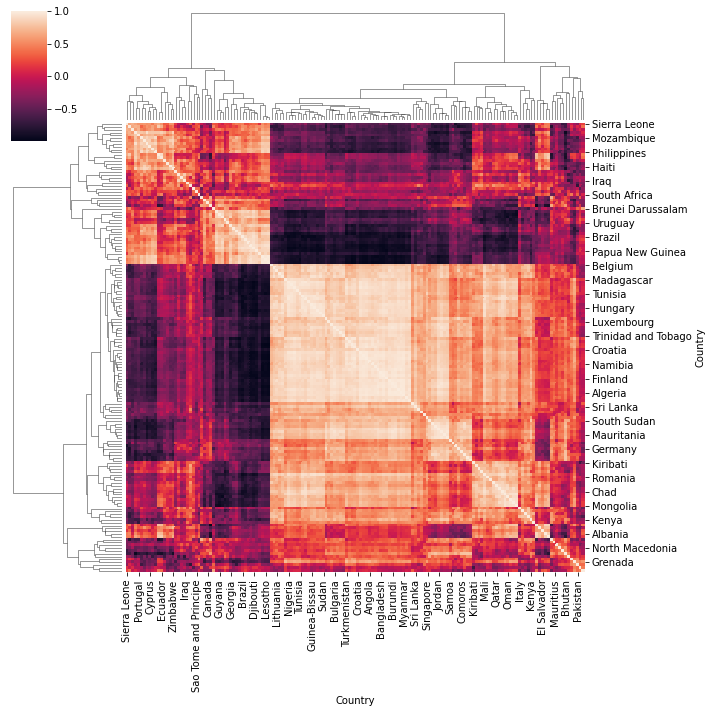

In [108]:
plt.figure(figsize=(20,20))
g=sns.clustermap(mortd_ccr_reshaped_c)

# Skaiciuojam Regresijos lygti Savizudybiu skaiciui pagal metus: abi lytys, vyrai, moterys, saugom abu parametrus ir R2 - modelio gerumo iverti 

Zr pavyzdi kaip vaizduoti https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [123]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

countries=[]
b0Both=[]
b1Both=[]
r2Both=[]
b0Males=[]
b1Males=[]
r2Males=[]
b0Females=[]
b1Females=[]
r2Females=[]

regr=LinearRegression()

for i in np.unique(mortd['Country']):
  countries.append(i)
  x=np.array(mortd[mortd['Country']==i]['Year'])
  X=x.reshape(-1,1)
  yB=np.array(mortd[mortd['Country']==i]['RSuicBoth'])
  yM=np.array(mortd[mortd['Country']==i]['RSuicMale'])
  yF=np.array(mortd[mortd['Country']==i]['RSuicFemale'])
  # fit LR
  # Both
  regr.fit(X,yB)
  b0Both.append(regr.intercept_)
  b1Both.append(regr.coef_[0])
  y_pred=regr.predict(X)
  r2=r2_score(yB,y_pred)
  r2Both.append(r2)
  print("Country ",i," R2= ",r2)
  # fit LR
  # Males
  regr.fit(X,yM)
  b0Males.append(regr.intercept_)
  b1Males.append(regr.coef_[0])
  y_pred=regr.predict(X)
  r2=r2_score(yM,y_pred)
  r2Males.append(r2)
  print("Country ",i," R2= ",r2)
  # fit LR
  # Females
  regr.fit(X,yF)
  b0Females.append(regr.intercept_)
  b1Females.append(regr.coef_[0])
  y_pred=regr.predict(X)
  r2=r2_score(yF,y_pred)
  r2Females.append(r2)
  print("Country ",i," R2= ",r2)
  
mortd_LR=pd.DataFrame(data={'Country': countries, 'Bintercept': b0Both, 'Bcoef': b1Both, 'Br2': r2Both, 'Mintercept': b0Males, 'Mcoef': b1Males, 'Mr2': r2Males, 'Fintercept': b0Females, 'Fcoef': b1Females, 'Fr2': r2Females })



Country  Afghanistan  R2=  0.8220157226036866
Country  Afghanistan  R2=  0.6313741002620598
Country  Afghanistan  R2=  0.9474975740186072
Country  Albania  R2=  0.036515873265171805
Country  Albania  R2=  0.06436451277999367
Country  Albania  R2=  0.015600127490663196
Country  Algeria  R2=  0.9609720926698609
Country  Algeria  R2=  0.967219537677943
Country  Algeria  R2=  0.9431165601907402
Country  Angola  R2=  0.9050452388447364
Country  Angola  R2=  0.9104076367690415
Country  Angola  R2=  0.8140078978556811
Country  Antigua and Barbuda  R2=  0.583353637827769
Country  Antigua and Barbuda  R2=  0.7521040400948424
Country  Antigua and Barbuda  R2=  0.4703160616473314
Country  Argentina  R2=  0.22793302762643564
Country  Argentina  R2=  0.24183472349058666
Country  Argentina  R2=  0.22242546186208434
Country  Armenia  R2=  0.044259024632361865
Country  Armenia  R2=  0.03726153160304535
Country  Armenia  R2=  0.03570986125208275
Country  Australia  R2=  0.2882421732917687
Country  Aust

In [82]:
pd.set_option('display.max_rows', 160)
mortd_LR.drop(columns=['Bintercept','Mintercept','Fintercept'],inplace=True)
mortd_LR.sort_values(by='Br2',axis=0,ascending=False).head(n=159)


,Country,Bcoef,Br2,Mcoef,Mr2,Fcoef,Fr2
120,Russian Federation,-1.559098,0.977694,-2.877218,0.977342,-0.387143,0.978908
99,Myanmar,-0.092782,0.968965,-0.107519,0.950024,-0.076842,0.961938
48,Ethiopia,-0.241128,0.962159,-0.293985,0.954053,-0.188195,0.951796
2,Algeria,-0.115940,0.960972,-0.145263,0.967220,-0.089023,0.943117
19,Botswana,-1.093008,0.960935,-1.484286,0.957530,-0.719173,0.886068
125,Senegal,-0.086617,0.949945,-0.130677,0.947897,-0.046015,0.903761
157,Zambia,-0.275639,0.940168,-0.233008,0.888191,-0.316917,0.938468
40,Djibouti,0.152406,0.939245,0.183759,0.905533,0.102256,0.945781
60,Guinea-Bissau,-0.117594,0.938544,-0.193684,0.939889,-0.051880,0.921653
106,Nigeria,-0.082932,0.937718,-0.106992,0.897120,-0.061729,0.956403


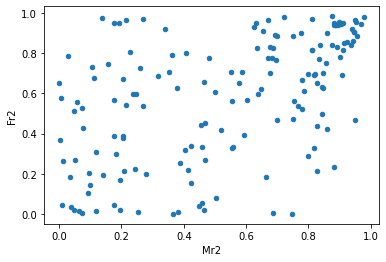

In [127]:
mortd_LR.plot.scatter(x='Mr2',y='Fr2')


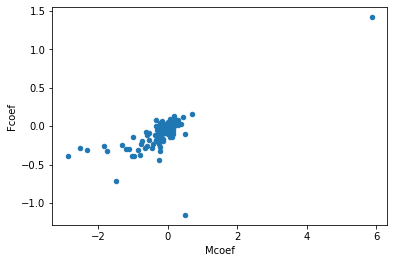

In [129]:
mortd_LR.plot.scatter(x='Mcoef',y='Fcoef')


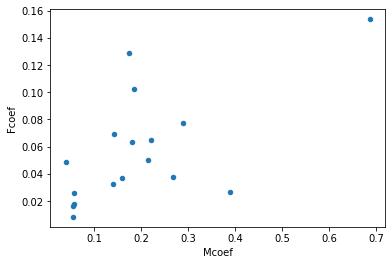

In [137]:
mortd_increase=mortd_LR[((mortd_LR['Mcoef']>0) & (mortd_LR['Fcoef']>0) & (mortd_LR['Br2']>0.5)) & (mortd_LR['Country']!='Lesotho')]
mortd_increase.plot.scatter(x='Mcoef',y='Fcoef')


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=mortd_increase, x='Mcoef',y='Fcoef')

for i in range(mortd_increase.shape[0]):
   plt.text(x=mortd_increase.Mcoef[i]+0.3,y=mortd_increase.Fcoef[i]+0.3,s=mortd_increase.Country[i],,fontdict=dict(color='red',size=10),bbox=dict(facecolor='yellow',alpha=0.5))